[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
  https://colab.research.google.com/github/blhuillier/MathPhysI/blob/main/Examples/I_Linear_Algebra/13_eigenspace.ipynb
)

In [1]:

import numpy as np
import matplotlib.pyplot as plt

import shutil

if shutil.which('latex') is None:
    print("LaTeX is not installed. turning off latex fonts in matplotlib (install latex if you want them on)")
    # !apt-get install -y texlive-full
    # !apt-get install -qq texlive-latex-base texlive-fonts-recommended dvipng cm-super
    plt.rcParams['text.usetex'] = False
else:
    print("LaTeX is installed.")
    plt.rcParams['text.usetex'] = True
    from sympy import Matrix, latex



LaTeX is not installed. turning off latex fonts in matplotlib (install latex if you want them on)


In [2]:

#  matrix with two real eigenvalues:
A = np.array([[2, 1],
              [1, 2]])

# Rotation matrix with complex eigenvalues:
B = np.array([[0.5, -np.sqrt(3)/2],
              [np.sqrt(3)/2, 0.5]])

print ("Eigenvalues of A:")
print (np.linalg.eigvals(A))
print ("Eigenvalues of B:")
print (np.linalg.eigvals(B))

Eigenvalues of A:
[3. 1.]
Eigenvalues of B:
[0.5+0.8660254j 0.5-0.8660254j]


In [3]:


def plot_linear_map(ax, A, name='$A$', x_range=(-5, 5), y_range=(-5, 5), step=1):
    """
    Draws the action of a 2×2 matrix A on a grid of points into the given Axes.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes on which to plot.
    A : array-like, shape (2,2)
        The linear transformation matrix.
    name : str
        Name of the matrix, used in the plot title.
    x_range : tuple (xmin, xmax)
        Range of x-values for the grid.
    y_range : tuple (ymin, ymax)
        Range of y-values for the grid.
    step : float
        Grid spacing.
    """
    # Generate grid points
    xs = np.arange(x_range[0], x_range[1] + step, step)
    ys = np.arange(y_range[0], y_range[1] + step, step)
    points = np.array([[x, y] for x in xs for y in ys])

    # Apply transformation
    transformed = points @ np.array(A).T

    # Plot original and transformed points
    ax.scatter(points[:, 0], points[:, 1], label=f'Original points')
    ax.scatter(transformed[:, 0], transformed[:, 1], marker='x', label=f'Transformed points ({name})')

    # Draw arrows
    U = transformed[:, 0] - points[:, 0]
    V = transformed[:, 1] - points[:, 1]
    ax.quiver(points[:, 0], points[:, 1], U, V,
              angles='xy', scale_units='xy', scale=1, alpha=0.6)

    # Aesthetics
    ax.set_aspect('equal', 'box')
    ax.set_xlim(x_range[0] - 1, x_range[1] + 1)
    ax.set_ylim(y_range[0] - 1, y_range[1] + 1)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title(f'Matrix {name}')
    ax.grid(True)




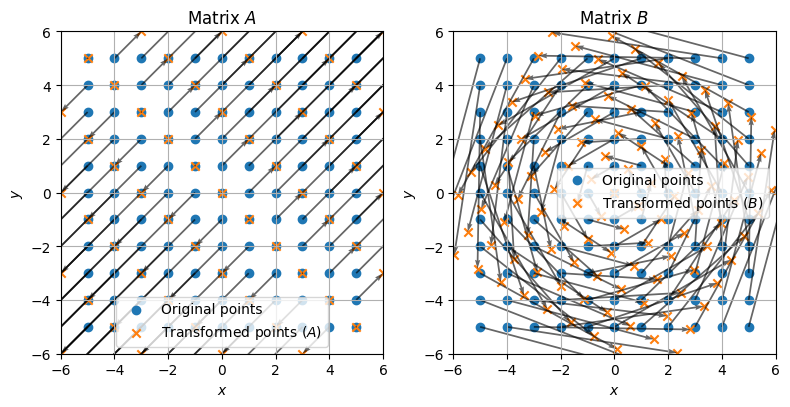

In [4]:

# Example usage with multiple matrices:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
plot_linear_map(axes[0], A, name='$A$')
plot_linear_map(axes[1], B, name='$B$')
for ax in axes:
    ax.legend()
fig.tight_layout()
# fig.savefig('eigen_2x2.png', dpi=300)